## Reading the midi File and finding the chords

In [8]:
from Tonnetz_Select import fromMidiToPCS
from structural_functions import testInput
from os.path import isdir

Will ask you the directory and the name of the file and returns the Modified list of chords and the appropriate Tonnetz

In [10]:
print("Enter the directory of the MIDI file")
directory = testInput(isdir)
file = input("Enter the name of the MIDI file(without the extension)")
complete_name = directory + '/' + file + '.mid'
chordListConnectNoDoubles, Tonnetz = fromMidiToPCS(complete_name)
print(file, "is complete with Tonnetz", Tonnetz)

Enter the directory of the MIDI file
Midi_files/haydn_string_quartets
Enter the name of the MIDI file(without the extension)op50n1-02
530
op50n1-02 is complete with Tonnetz [2, 3, 7]


## Trajectory Calculations

### Computing Trajectory (Attention trjectory is an object !)

In [11]:
from TrajectoryCalculationsWithClass import *

In [4]:
trajectory = NewTrajectory(chordListConnectNoDoubles, Tonnetz)

### Let's find the edges

In [5]:
import itertools as itt
def TrajectoryNoteEdges(TrajectoryPoints, Tonnetz):
    TotalEdges = []
    dist = [-1, 0, 1]
    for dicts in TrajectoryPoints:
        chordEdges = []
        l = list(itt.product(dicts.values(), dicts.values()))
        for couple in l:
            (x1, y1), (x2, y2) = couple
            if (x1 - x2) in dist  and (y1 - y2) in dist:
                if not (((x1 - x2) == 1 and (y1 - y2) == -1) or ((x1 - x2) == -1 and (y1 - y2) == 1)) :
                    chordEdges.append(couple)
        TotalEdges.append(chordEdges)
    return TotalEdges

In [6]:
TrajectoryEdges = TrajectoryNoteEdges(trajectory.chordPositions, Tonnetz)

### Let's plot that!

First just Points

<IPython.core.display.Javascript object>


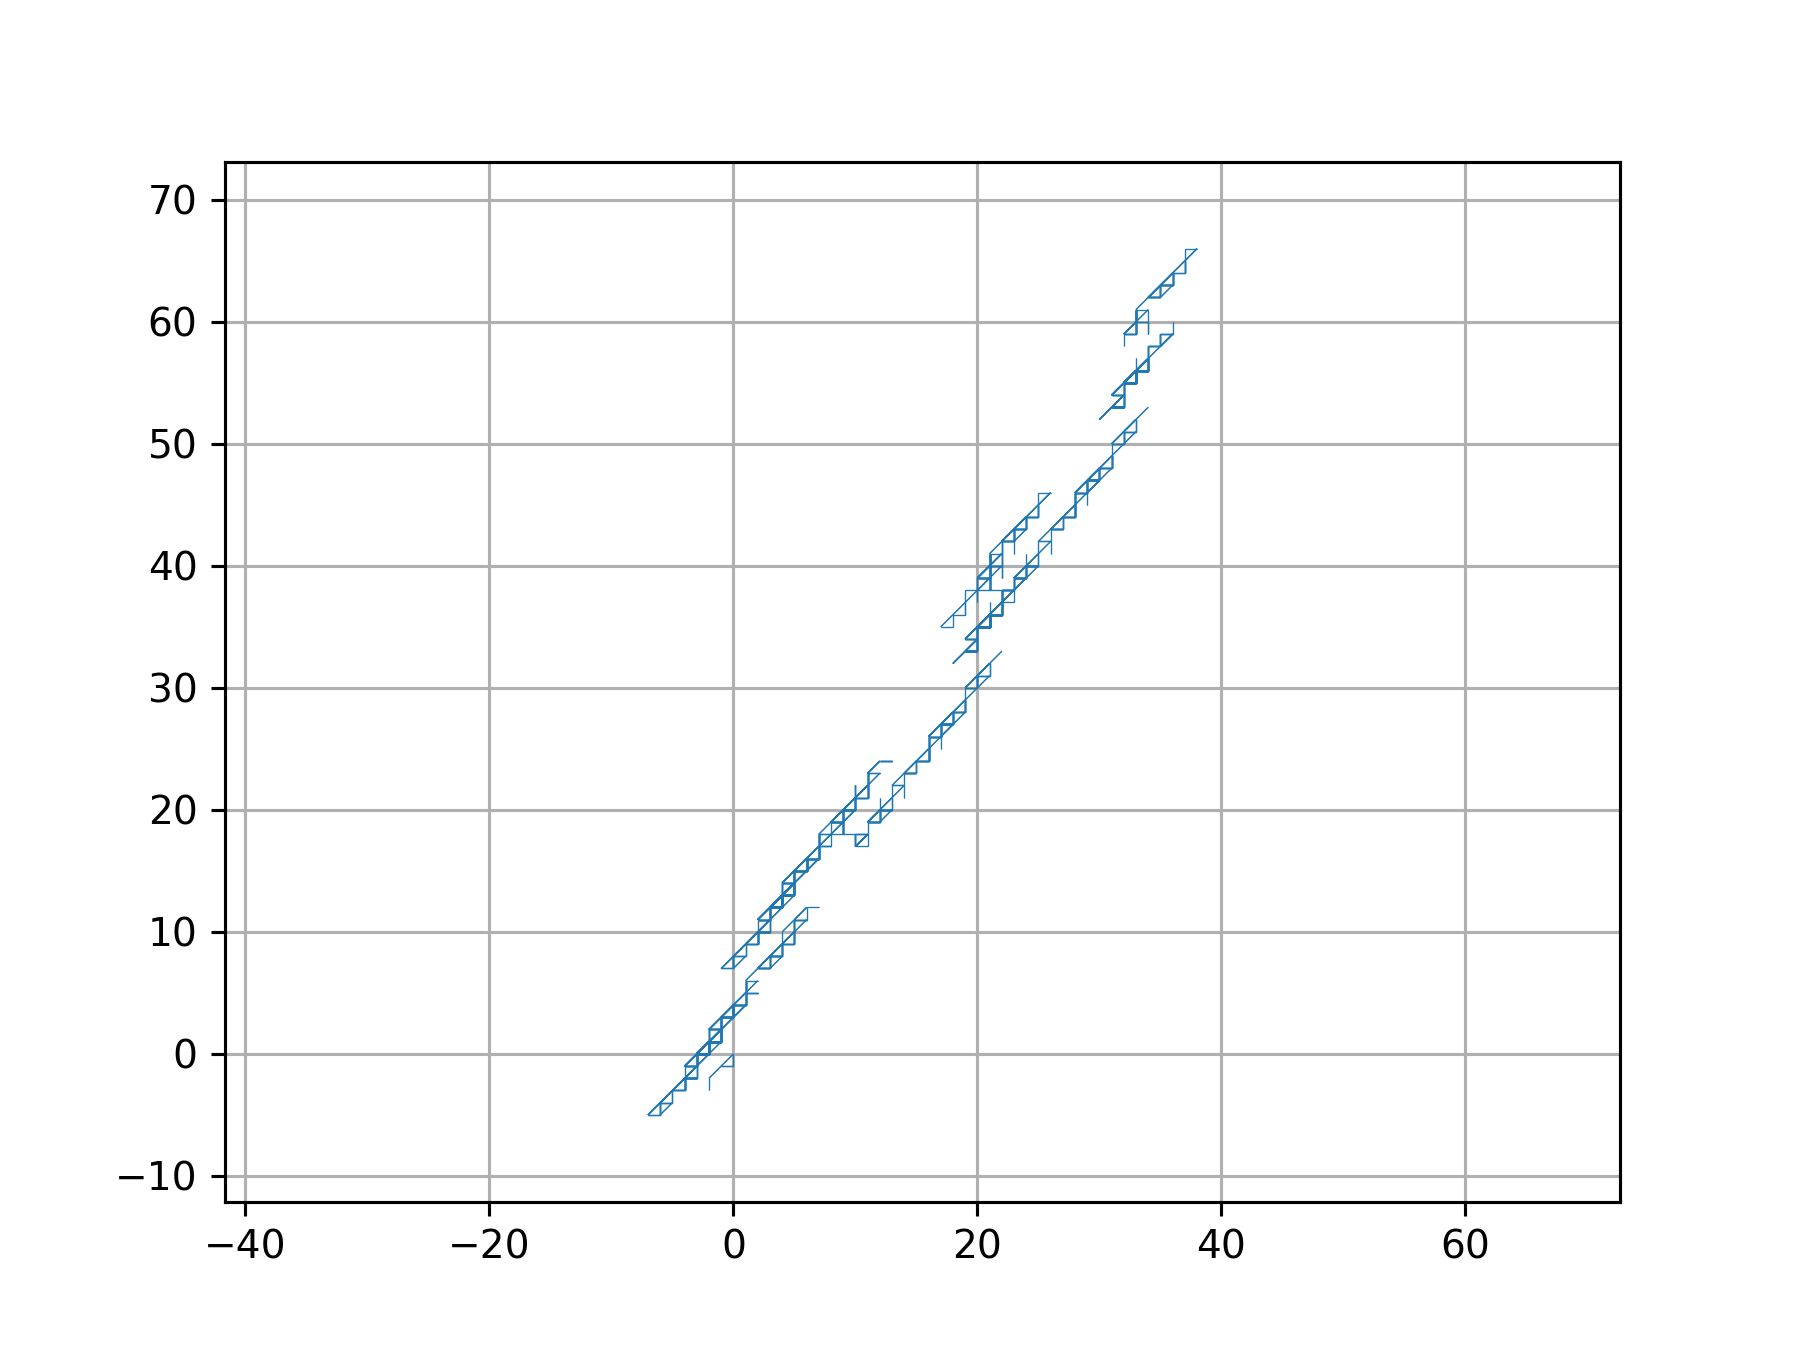

In [7]:
%matplotlib notebook

import numpy as np
import pylab as plt
from matplotlib import collections  as mc

fig, ax = plt.subplots()
    
for el in TrajectoryEdges:
    line = []
    line = mc.LineCollection(el, linewidths=0.3)
    ax.add_collection(line)
    ax.autoscale()
    ax.margins(0.1)

plt.grid()
plt.axis('equal')


plt.show()

### Lets Find all the Edges by building a product on all points

Let's try graph libraries

In [1]:
import networkx as nx
G = nx.Graph()

In [13]:
def NotesToEdges(TrajectoryPoints, TrajectoryNoteEdges, Graph):
    listofPoints = []
    for i, dicts in enumerate(TrajectoryPoints):
        for el in dicts:
            Graph.add_node(dicts[el])
    for j in TrajectoryNoteEdges:
        Graph.add_edge(j[0], j[1])
    return Graph

In [14]:
newGraph = NotesToEdges(trajectory.chordPositions, TrajectoryEdges, G)
%matplotlib notebook

nx.draw(newGraph)
plt.show()

IndexError: list index out of range